In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [2]:
# 한글폰트 설정
import matplotlib.font_manager as fm

# 글꼴 파일 경로
font_path = 'C:\\Windows\\Fonts\\NGULIM.TTF'

# 글꼴 설정
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [3]:
# 분석용 데이터 불러오기
crime = pd.read_csv('경찰청_범죄 발생 지역별 통계_20221231.csv',encoding='euc-kr')
crime

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,35,29,16,14,1,6,8,2,...,1,2,1,2,5,0,1,3,4,19
1,강력범죄,살인미수등,68,24,15,38,2,11,7,3,...,2,0,3,1,11,1,4,4,1,43
2,강력범죄,강도,118,43,31,30,10,17,10,2,...,1,1,0,0,12,5,1,4,1,28
3,강력범죄,강간,1200,347,215,340,152,200,112,26,...,6,12,36,41,77,19,17,78,18,375
4,강력범죄,유사강간,219,83,43,61,32,34,14,6,...,0,2,3,2,14,4,8,13,3,52
5,강력범죄,강제추행,4358,1064,648,1030,391,500,311,73,...,23,25,66,97,232,38,84,201,18,848
6,강력범죄,기타강간강제추행등,35,14,9,16,8,2,10,1,...,1,1,0,1,5,2,0,3,1,23
7,강력범죄,방화,217,89,50,70,35,40,28,8,...,5,5,4,10,24,5,9,20,0,114
8,절도범죄,절도범죄,37594,13699,9792,8895,5204,6034,3283,1110,...,308,342,1158,2114,3426,387,886,2247,43,9454
9,폭력범죄,상해,3353,2478,1568,1545,641,831,683,119,...,121,113,221,251,635,134,213,351,16,2612


In [4]:
# 옆으로 길게 누운 데이터 세우기
crime = pd.melt(crime, id_vars=['범죄대분류','범죄중분류'], var_name='지역',value_name='건수')
crime

,범죄대분류,범죄중분류,지역,건수
0,강력범죄,살인기수,서울,35
1,강력범죄,살인미수등,서울,68
2,강력범죄,강도,서울,118
3,강력범죄,강간,서울,1200
4,강력범죄,유사강간,서울,219
...,...,...,...,...
3301,노동범죄,노동범죄,도시이외,32
3302,안보범죄,안보범죄,도시이외,9
3303,선거범죄,선거범죄,도시이외,461
3304,병역범죄,병역범죄,도시이외,214


In [5]:
# 데이터 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

범죄대분류 = crime['범죄대분류']
범죄대분류_encode = pd.DataFrame(범죄대분류)
범죄대분류_encode['encode'] = label_encoder.fit_transform(범죄대분류_encode['범죄대분류'])
print(범죄대분류_encode)

범죄중분류 = crime['범죄중분류']
범죄중분류_encode = pd.DataFrame(범죄중분류)
범죄중분류_encode['encode'] = label_encoder.fit_transform(범죄중분류_encode['범죄중분류'])
print(범죄중분류_encode)

지역 = crime['지역']
지역_encode = pd.DataFrame(지역)
지역_encode['encode'] = label_encoder.fit_transform(지역_encode['지역'])
print(지역_encode)

     범죄대분류  encode
0     강력범죄       0
1     강력범죄       0
2     강력범죄       0
3     강력범죄       0
4     강력범죄       0
...    ...     ...
3301  노동범죄       3
3302  안보범죄       8
3303  선거범죄       7
3304  병역범죄       5
3305  기타범죄       2

[3306 rows x 2 columns]
      범죄중분류  encode
0      살인기수      16
1     살인미수등      17
2        강도       1
3        강간       0
4      유사강간      25
...     ...     ...
3301   노동범죄       7
3302   안보범죄      22
3303   선거범죄      19
3304   병역범죄      13
3305   기타범죄       6

[3306 rows x 2 columns]
        지역  encode
0       서울      59
1       서울      59
2       서울      59
3       서울      59
4       서울      59
...    ...     ...
3301  도시이외      57
3302  도시이외      57
3303  도시이외      57
3304  도시이외      57
3305  도시이외      57

[3306 rows x 2 columns]


In [6]:
# 데이터 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

crime['범죄대분류'] = label_encoder.fit_transform(crime['범죄대분류'])
crime['범죄중분류'] = label_encoder.fit_transform(crime['범죄중분류'])
crime['지역'] = label_encoder.fit_transform(crime['지역'])
crime

,범죄대분류,범죄중분류,지역,건수
0,0,16,59,35
1,0,17,59,68
2,0,1,59,118
3,0,0,59,1200
4,0,25,59,219
...,...,...,...,...
3301,3,7,57,32
3302,8,22,57,9
3303,7,19,57,461
3304,5,13,57,214


In [7]:
# 데이터셋 기본 정보
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   범죄대분류   3306 non-null   int64
 1   범죄중분류   3306 non-null   int64
 2   지역      3306 non-null   int64
 3   건수      3306 non-null   int64
dtypes: int64(4)
memory usage: 103.4 KB


In [8]:
# 데이터 기본 통계 정보 확인
crime.describe()

,범죄대분류,범죄중분류,지역,건수
count,3306.000000,3306.000000,3306.000000,3306.000000
mean,7.421053,18.500000,43.000000,448.406836
std,4.865386,10.967515,25.116877,2174.903212
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,21.000000,3.000000
50%,10.000000,18.500000,43.000000,20.500000
75%,12.000000,28.000000,65.000000,148.000000
max,14.000000,37.000000,86.000000,52034.000000


In [9]:
# 결측치 확인
crime.isnull().sum()

범죄대분류    0
범죄중분류    0
지역       0
건수       0
dtype: int64

In [10]:
# 중복 데이터 확인
crime.duplicated().sum()

np.int64(0)

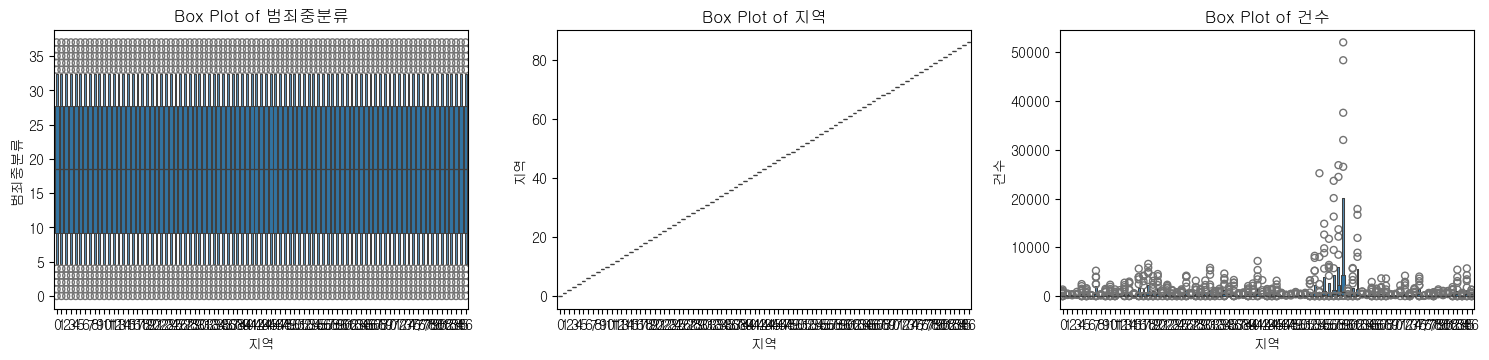

In [11]:
# 이상치 확인(박스플록)
plt.figure(figsize=(15,10))
for i, column in enumerate(crime.columns[1:]):
    plt.subplot(3,3,i+1)
    sns.boxenplot(x='지역',y=column, data=crime)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

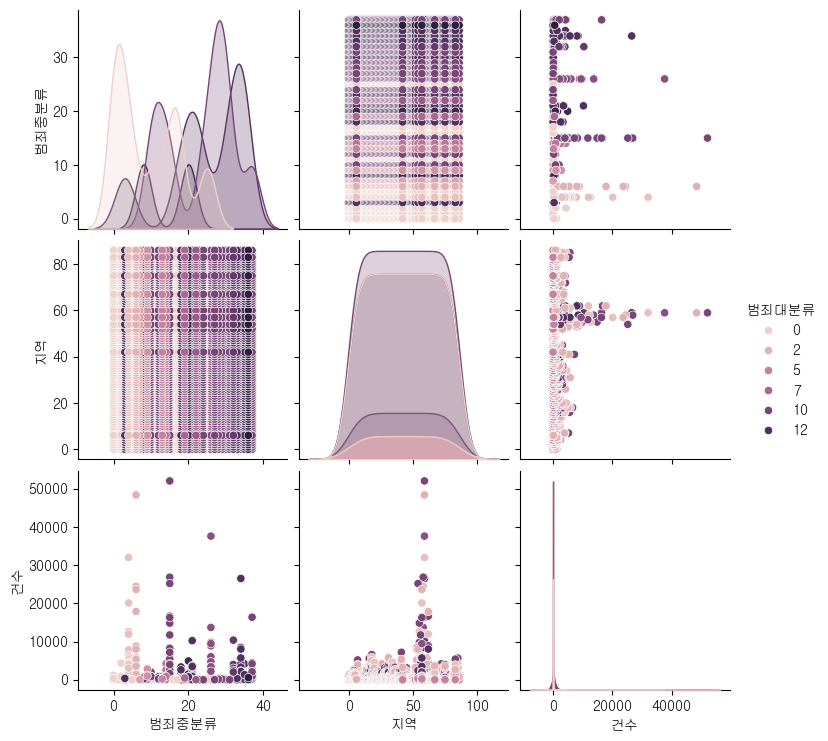

In [12]:
# 데이터 분포 및 밀도 확인
sns.pairplot(crime, hue='범죄대분류',diag_kind='kde')
plt.show()

In [13]:
# 상관관계 분석(상관계수 계산)
crime.corr()

,범죄대분류,범죄중분류,지역,건수
범죄대분류,1.000000e+00,6.225606e-01,6.092047e-16,-0.013089
범죄중분류,6.225606e-01,1.000000e+00,-4.092366e-16,-0.038505
지역,6.092047e-16,-4.092366e-16,1.000000e+00,0.046963
건수,-1.308872e-02,-3.850466e-02,4.696322e-02,1.000000


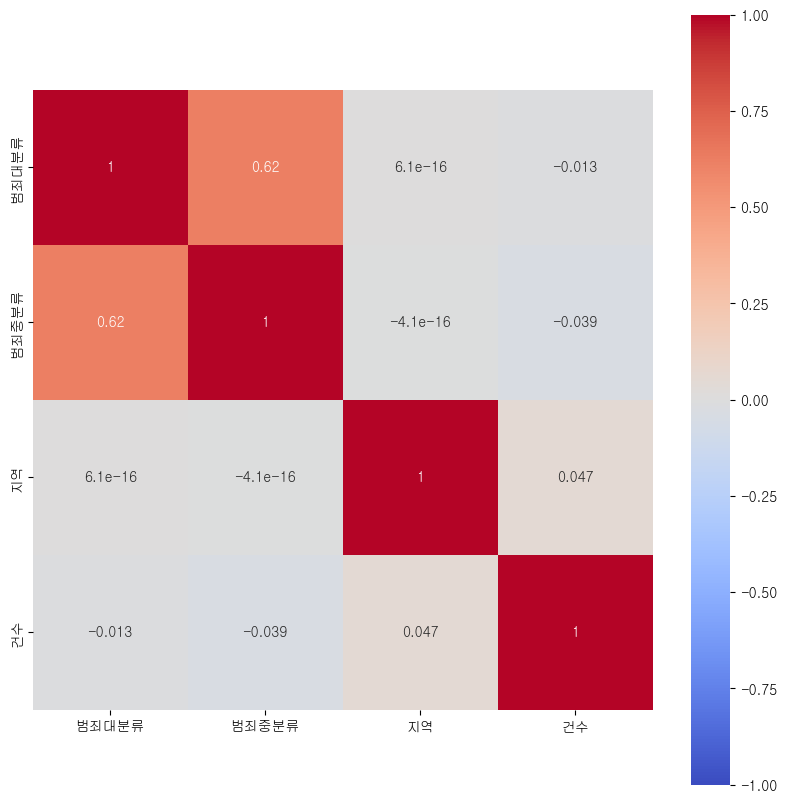

In [14]:
# 상관관계 시각화
plt.figure(figsize=(10,10))
sns.heatmap(data=crime.corr(), vmin=-1, vmax=1, square=True, annot=True, cbar=True, cmap='coolwarm')
plt.show()